# EDA

## 1. 数据正确性

In [1]:
import pandas as pd
DATA_PATH = 'G:/DataSets/kaggle/Elo Merchant Category Recommendation'

# 加载数据
train = pd.read_csv(f"{DATA_PATH}/train.csv")
test = pd.read_csv(f"{DATA_PATH}/test.csv")
print(f"Train data shape: {train.shape}, Test data shape: {test.shape}")

Train data shape: (201917, 6), Test data shape: (123623, 5)


In [2]:
assert train['card_id'].nunique() == train['card_id'].shape[0]  # 训练集card_id唯一
assert test['card_id'].nunique() == test['card_id'].shape[0]  # 测试集card_id唯一
assert test['card_id'].nunique()+ train['card_id'].nunique()  == len(set(test['card_id'].values.tolist()+ train['card_id'].values.tolist()))  # card_id无重复

## 2. 缺失值

In [3]:
# easier_excel.desc_data不依赖于其余模块，可以单独下下来这个py文件来使用。集成只是为了更便于复用
from easier_excel.desc_data import DescData
train_desc = DescData(train)
test_desc = DescData(test)
# 懒人描述
train_desc_auto = train_desc.auto_desc()
test_desc_auto = test_desc.auto_desc()
print(f"Train auto desc:\n{train_desc_auto}")
print(f"Test auto desc:\n{test_desc_auto}")

# 查看含有缺失值的列与缺失值数量
train_missing_info = train_desc.desc_missing_values()
test_missing_info = test_desc.desc_missing_values()
print(f"Train missing info:\n{train_missing_info}")
print(f"Test missing info:\n{test_missing_info}")

# 查看test有缺失值的那一行
test[test.isnull().values==True]  # 11578行

数据集的形状为：(201917, 6)
数据集的形状为：(123623, 5)
Train auto desc:
              Feature  n_unique  缺失值占比(%)  最大类别占比(%)     type
0  first_active_month        75       0.0   6.873121   object
1             card_id    201917       0.0   0.000495   object
2           feature_1         5       0.0  36.437249    int64
3           feature_2         3       0.0  44.197368    int64
4           feature_3         2       0.0  56.556902    int64
5              target    197110       0.0   1.093023  float64
Test auto desc:
              Feature  n_unique  缺失值占比(%)  最大类别占比(%)    type
0  first_active_month        75  0.000809   7.122461  object
1             card_id    123623  0.000000   0.000809  object
2           feature_1         5  0.000000  36.173689   int64
3           feature_2         3  0.000000  44.308098   int64
4           feature_3         2  0.000000  56.437718   int64
Train missing info:
无缺失值
Test missing info:
                    count      rate
first_active_month      1  0.000008


,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaN,C_ID_c27b4f80f7,5,2,1


## 3. 分布差异

分析的4个特征：['feature_1', 'first_active_month', 'feature_2', 'feature_3']

[Feature] feature_1 >>> [feature_1] JS Div=0.000006


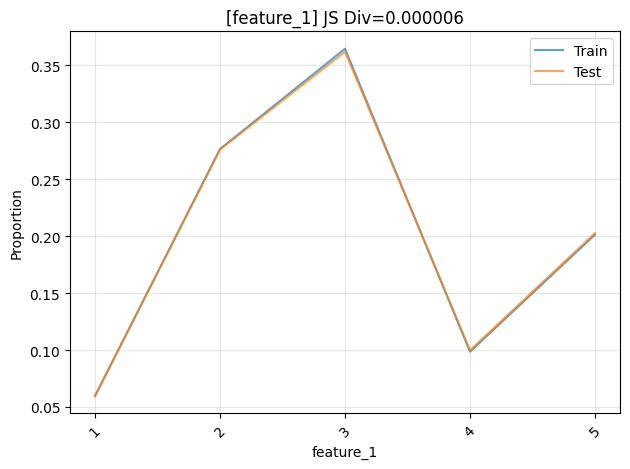


[Feature] first_active_month >>> [first_active_month] JS Div=0.000109


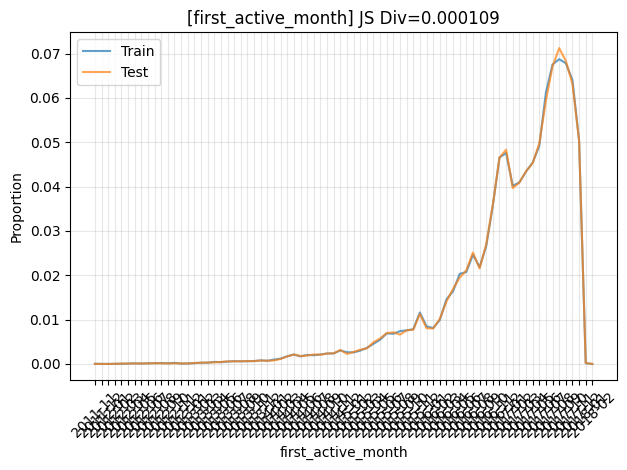


[Feature] feature_2 >>> [feature_2] JS Div=0.000005


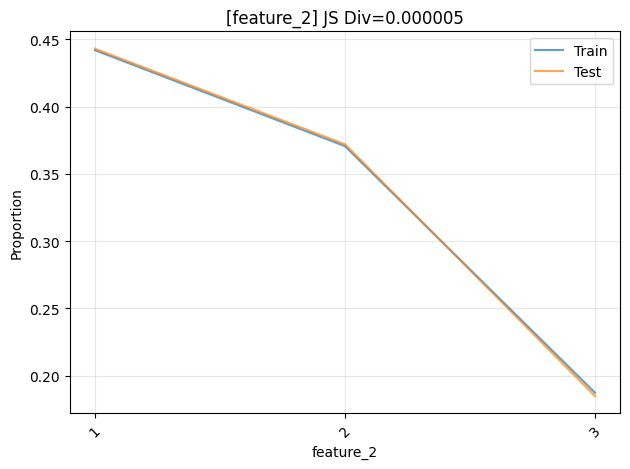


[Feature] feature_3 >>> [feature_3] JS Div=0.000001


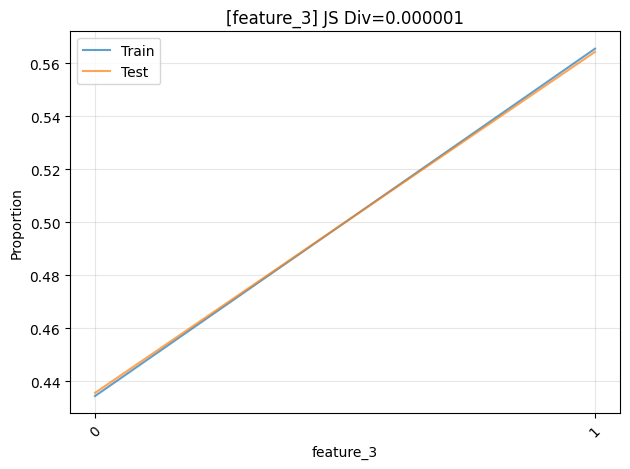

In [4]:
from easier_excel.desc_data import plot_feature_distributions
plot_feature_distributions(train, test, exclude_features=['card_id'])


## 4. 数据分布


[log] -------------------- 

正在分析表格：训练集
表格的形状：(201917, 6)

>>> 类别型字段（4 个）：['first_active_month', 'feature_1', 'feature_2', 'feature_3']
字段：first_active_month
first_active_month是类别型数据，共有75个不同的值
first_active_month
2017-09    13878
2017-10    13695
2017-08    13638
2017-11    12930
2017-07    12363
           ...  
2012-03       10
2011-11        8
2012-02        7
2011-12        2
2018-02        1
Name: count, Length: 75, dtype: int64
字段：feature_1
feature_1是类别型数据，共有5个不同的值
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64
字段：feature_2
feature_2是类别型数据，共有3个不同的值
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64
字段：feature_3
feature_3是类别型数据，共有2个不同的值
feature_3
1    114198
0     87719
Name: count, dtype: int64

[log] 正在绘制类别型字段的统计图...


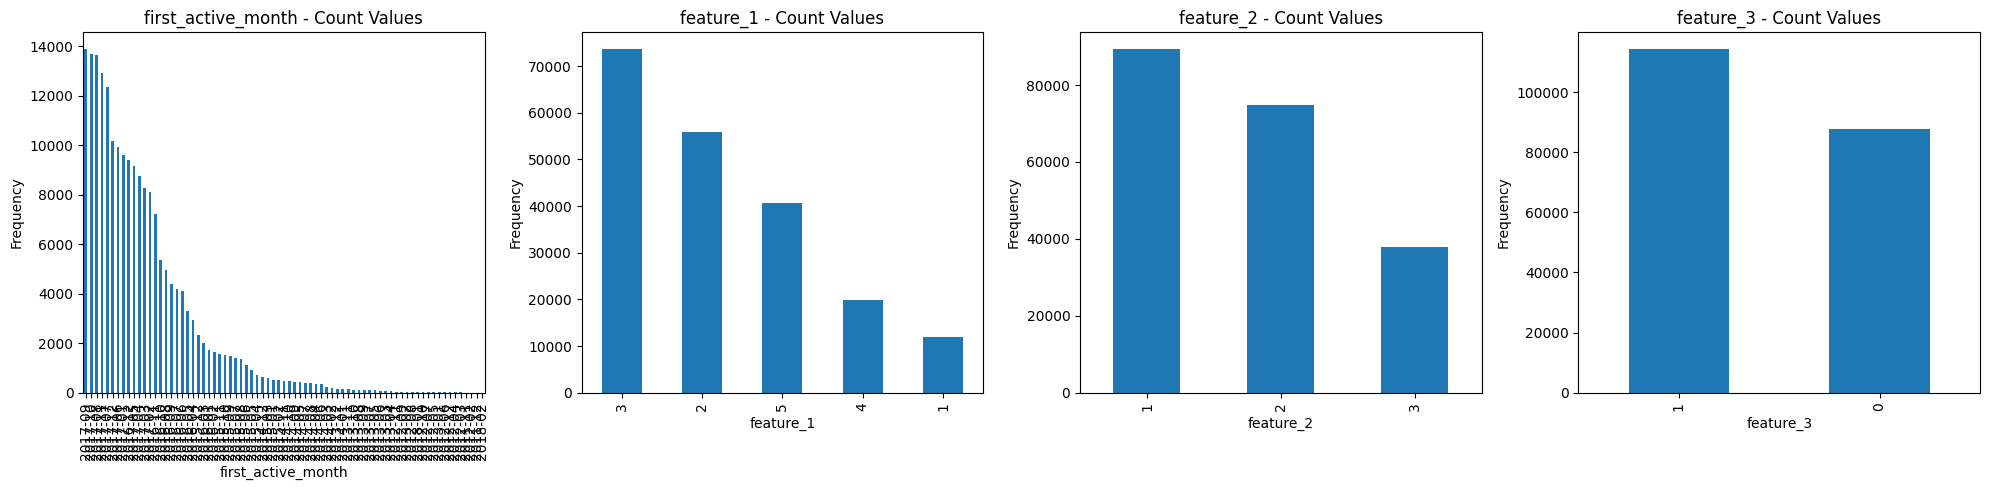


>>> 数值型字段（1 个）：['target']

字段：target
target是数值型数据，共有197110个不同的值
count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

[log] 正在绘制数值型字段的分布图...


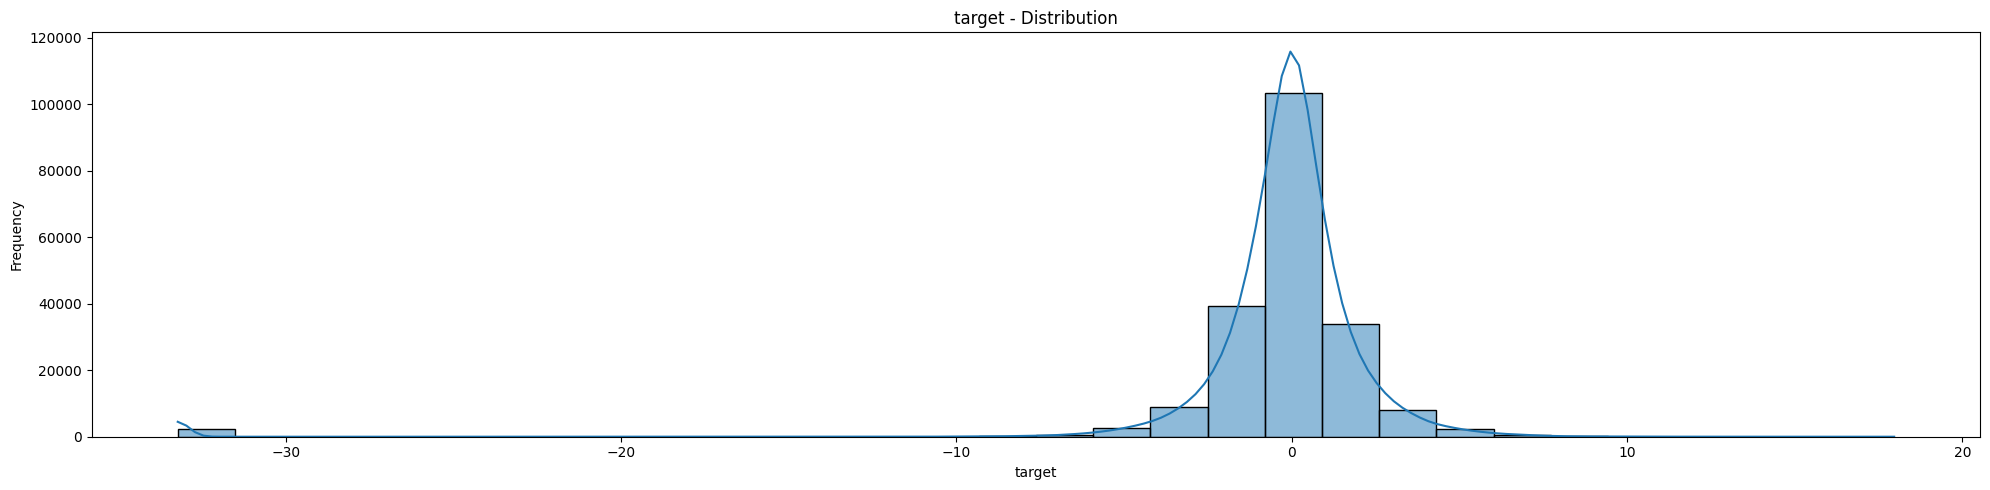


[log] -------------------- 

正在分析表格：测试集
表格的形状：(123623, 5)

>>> 类别型字段（4 个）：['first_active_month', 'feature_1', 'feature_2', 'feature_3']
字段：first_active_month
first_active_month是类别型数据，共有75个不同的值
first_active_month
2017-09    8805
2017-10    8451
2017-08    8299
2017-11    7807
2017-07    7344
           ... 
2012-03      10
2012-02       4
2011-11       3
2011-12       2
2012-01       1
Name: count, Length: 75, dtype: int64
字段：feature_1
feature_1是类别型数据，共有5个不同的值
feature_1
3    44719
2    34115
5    25051
4    12332
1     7406
Name: count, dtype: int64
字段：feature_2
feature_2是类别型数据，共有3个不同的值
feature_2
1    54775
2    45993
3    22855
Name: count, dtype: int64
字段：feature_3
feature_3是类别型数据，共有2个不同的值
feature_3
1    69770
0    53853
Name: count, dtype: int64

[log] 正在绘制类别型字段的统计图...


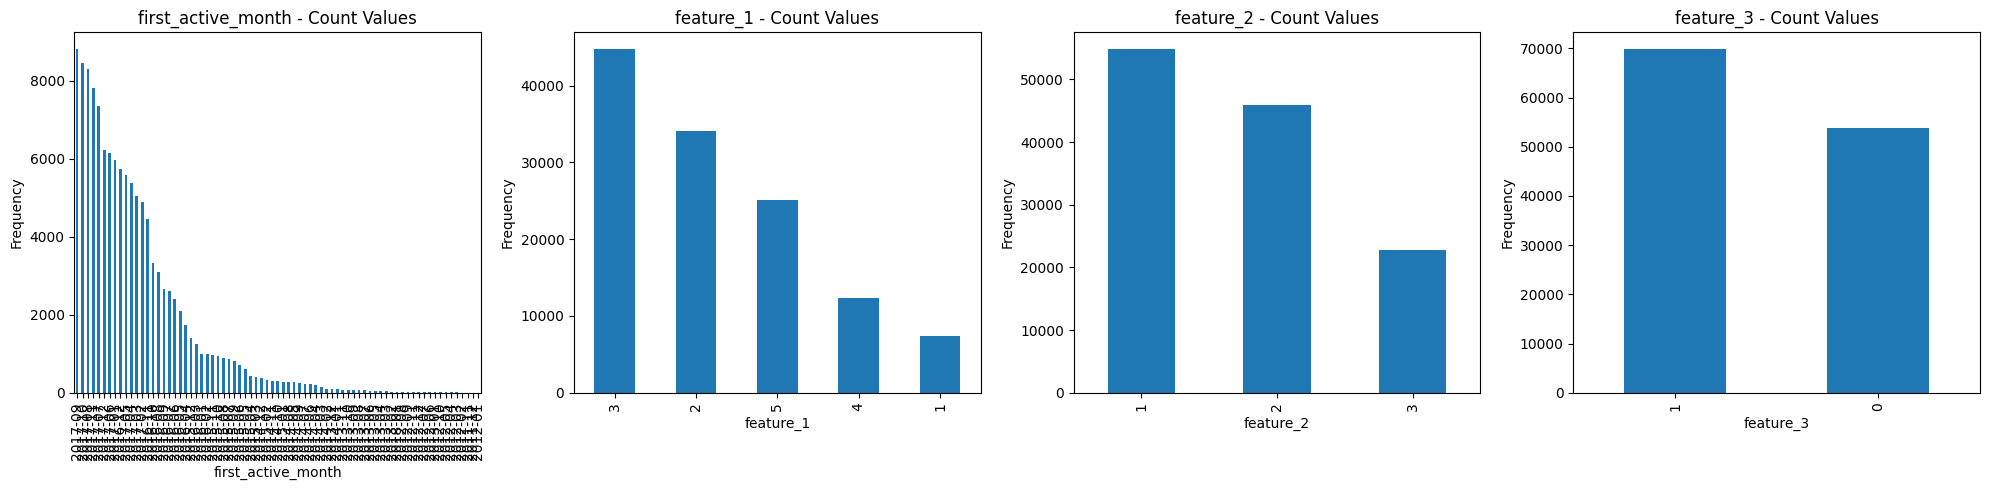


>>> 数值型字段（0 个）：[]


In [5]:
from easier_excel.desc_data import describe_and_visualize
describe_and_visualize(train, "训练集", exclude_columns=['card_id'])
describe_and_visualize(test, "测试集", exclude_columns=['card_id'])